In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


import warnings
# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")

In [3]:
X = df.iloc[:, :-1]

y = df.iloc[:, -1]




## Splitting & Using GB


In [4]:
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)


## Using Evaluation Metrics

Accuracy =  94.83568075117371 %
Precision =  0.9130480445771597
Recall =  0.9212040704497602
F1-score =  0.9166163584874228


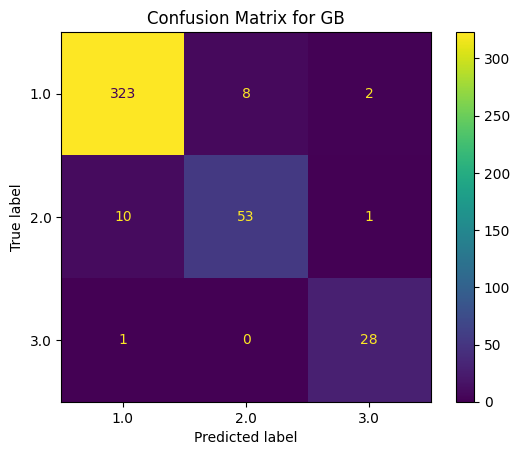

Classification Report
              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97       333
         2.0       0.87      0.83      0.85        64
         3.0       0.90      0.97      0.93        29

    accuracy                           0.95       426
   macro avg       0.91      0.92      0.92       426
weighted avg       0.95      0.95      0.95       426



In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Calculating using average macro
print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='macro'))
print("Recall = ", recall_score(y_test, y_pred,average='macro'))
print("F1-score = ", f1_score(y_test, y_pred,average='macro'))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for GB')
plt.show()
# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


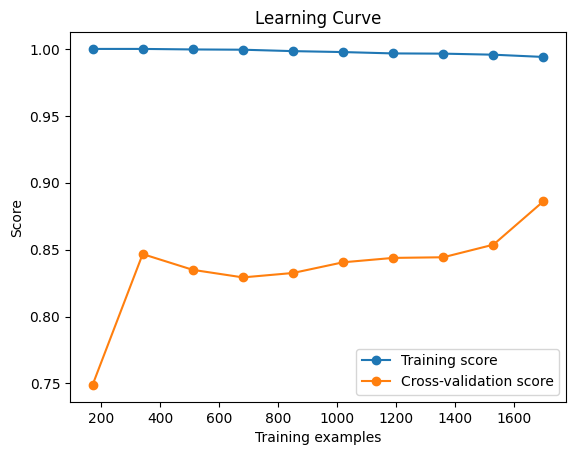

In [6]:
train_sizes, train_scores, test_scores = learning_curve(gradient_boosting, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

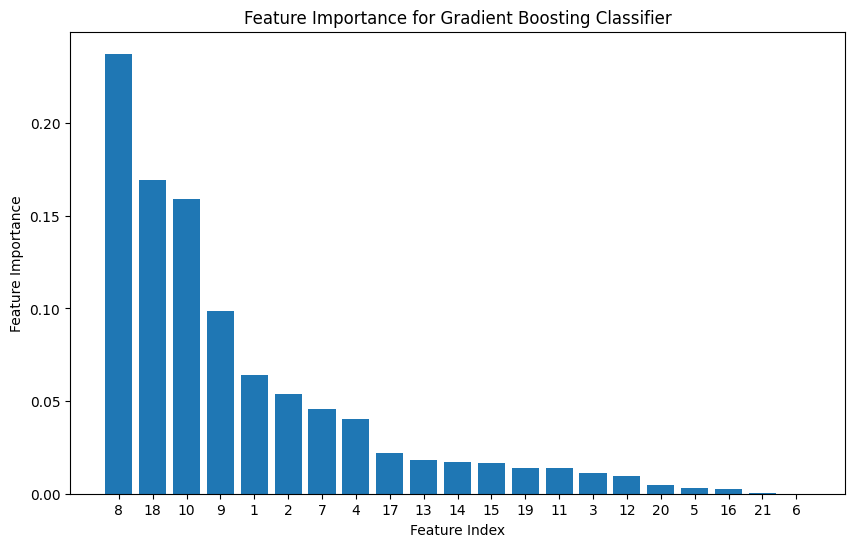

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

gb_classifier.fit(X_train, y_train)

feature_importances = gb_classifier.feature_importances_

sorted_features_indices = feature_importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_features_indices])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Gradient Boosting Classifier')
plt.xticks(range(X.shape[1]), sorted_features_indices + 1)  # Adding 1 to make indices start from 1
plt.show()


In [8]:
top_k_features_indices = sorted_features_indices[:16]
print("Indices of Important Features:", top_k_features_indices)

X_selected = X.iloc[:, top_k_features_indices]

Indices of Important Features: [ 7 17  9  8  0  1  6  3 16 12 13 14 18 10  2 11]


## Checking class distribution

Class Distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64
Coefficient of Variation (CV): 1.1595095195631708


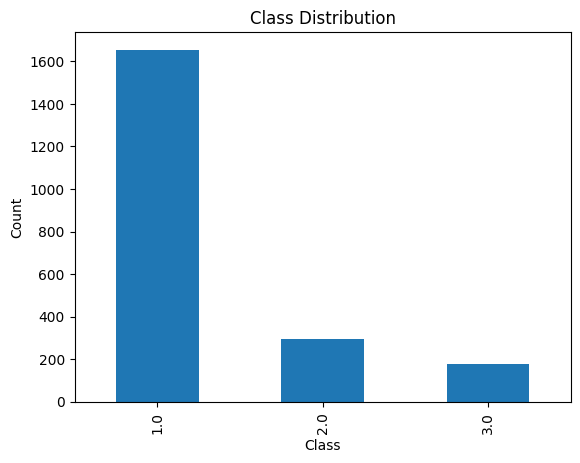

In [9]:

target_column = 'fetal_health'

class_distribution = df[target_column].value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Applying SMOTE


In [10]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Apply SMOTE only on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)




Class Distribution:
fetal_health
1.0    1322
2.0    1322
3.0    1322
Name: count, dtype: int64
Coefficient of Variation (CV): 0.0


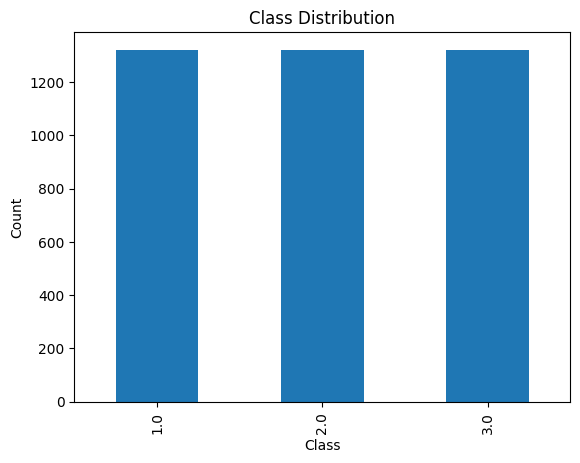

In [11]:
y_resampled_series = pd.Series(y_resampled)

# Calculate and plot class distribution
class_distribution = y_resampled_series.value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Using GB

In [12]:


from sklearn.model_selection import cross_val_score, KFold
gradient_boosting_after = GradientBoostingClassifier()
gradient_boosting_after.fit(X_resampled, y_resampled)


y_pred_full = gradient_boosting_after.predict(X_resampled)
y_pred_test = gradient_boosting_after.predict(X_test)





## Using Evaluation Metrics

Metrics on Resampled Training Set:
Accuracy (Resampled): 0.9914271306101866
Precision (macro, Resampled): 0.9914562653386838
Recall (macro, Resampled): 0.9914271306101865
F1-score (macro, Resampled): 0.991433144274878


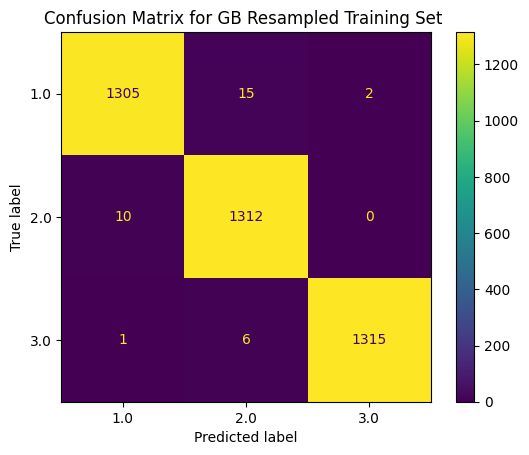


Metrics on Test Set:
Test Accuracy: 0.9460093896713615
Test Precision (macro): 0.8950647413192222
Test Recall (macro): 0.9517329829829829
Test F1-score (macro): 0.9212986189558047


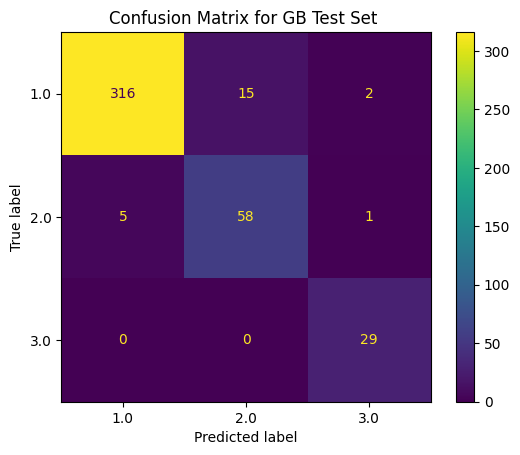

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Evaluate on the resampled training set
accuracy_resampled = accuracy_score(y_resampled, y_pred_full)
precision_resampled = precision_score(y_resampled, y_pred_full, average='macro')
recall_resampled = recall_score(y_resampled, y_pred_full, average='macro')
f1_resampled = f1_score(y_resampled, y_pred_full, average='macro')

conf_matrix_resampled = confusion_matrix(y_resampled, y_pred_full)

print("Metrics on Resampled Training Set:")
print("Accuracy (Resampled):", accuracy_resampled)
print("Precision (macro, Resampled):", precision_resampled)
print("Recall (macro, Resampled):", recall_resampled)
print("F1-score (macro, Resampled):", f1_resampled)

# Display confusion matrix for resampled training set
disp_resampled = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_resampled, display_labels=np.unique(y))
disp_resampled.plot()
plt.title('Confusion Matrix for GB Resampled Training Set ')
plt.show()

# Evaluate on the original test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='macro')
recall_test = recall_score(y_test, y_pred_test, average='macro')
f1_test = f1_score(y_test, y_pred_test, average='macro')

conf_matrix_test = confusion_matrix(y_test, y_pred_test)

print("\nMetrics on Test Set:")
print("Test Accuracy:", accuracy_test)
print("Test Precision (macro):", precision_test)
print("Test Recall (macro):", recall_test)
print("Test F1-score (macro):", f1_test)

# Display confusion matrix for test set
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test, display_labels=np.unique(y))
disp_test.plot()
plt.title('Confusion Matrix for GB Test Set ')
plt.show()


## K fold

In [14]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set up K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform K-Fold cross-validation
for train_index, val_index in kf.split(X_selected, y):
    X_train_fold, X_val_fold = X_selected.iloc[train_index], X_selected.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    # Apply SMOTE only on the training fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled_fold, y_resampled_fold = smote.fit_resample(X_train_fold, y_train_fold)

    # Train the Gradient Boosting classifier
    gradient_boosting_fold = GradientBoostingClassifier()
    gradient_boosting_fold.fit(X_resampled_fold, y_resampled_fold)

    # Predict on the validation fold
    y_pred_val = gradient_boosting_fold.predict(X_val_fold)

    # Evaluate the model
    accuracy_scores.append(accuracy_score(y_val_fold, y_pred_val))
    precision_scores.append(precision_score(y_val_fold, y_pred_val, average='weighted'))
    recall_scores.append(recall_score(y_val_fold, y_pred_val, average='weighted'))
    f1_scores.append(f1_score(y_val_fold, y_pred_val, average='weighted'))

# Calculate average evaluation metrics
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


Average Accuracy: 0.9379044462855566
Average Precision: 0.940900124958309
Average Recall: 0.9379044462855566
Average F1 Score: 0.9389524334418656


## Stratified K fold

In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform Stratified K-Fold cross-validation
for train_index, val_index in skf.split(X_selected, y):
    X_train_fold, X_val_fold = X_selected.iloc[train_index], X_selected.iloc[val_index]
    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

    # Apply SMOTE only on the training fold
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_resampled_fold, y_resampled_fold = smote.fit_resample(X_train_fold, y_train_fold)

    # Train the Gradient Boosting classifier
    gradient_boosting_fold = GradientBoostingClassifier()
    gradient_boosting_fold.fit(X_resampled_fold, y_resampled_fold)

    # Predict on the validation fold
    y_pred_val = gradient_boosting_fold.predict(X_val_fold)

    # Evaluate the model
    accuracy_scores.append(accuracy_score(y_val_fold, y_pred_val))
    precision_scores.append(precision_score(y_val_fold, y_pred_val, average='weighted'))
    recall_scores.append(recall_score(y_val_fold, y_pred_val, average='weighted'))
    f1_scores.append(f1_score(y_val_fold, y_pred_val, average='weighted'))

# Calculate average evaluation metrics
avg_accuracy = sum(accuracy_scores) / len(accuracy_scores)
avg_precision = sum(precision_scores) / len(precision_scores)
avg_recall = sum(recall_scores) / len(recall_scores)
avg_f1 = sum(f1_scores) / len(f1_scores)

print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)


Average Accuracy: 0.9402684341342171
Average Precision: 0.9429034941774154
Average Recall: 0.9402684341342171
Average F1 Score: 0.9410858926040151


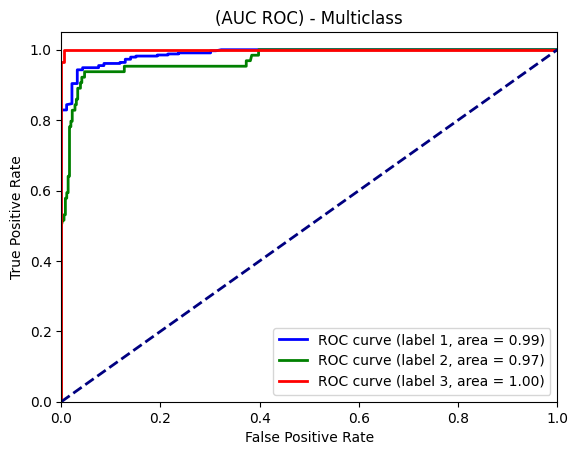

In [16]:
# For multiclass

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_test_binarized = label_binarize(y_test, classes=[1, 2, 3])
y_scores = gradient_boosting_after.predict_proba(X_test)


plt.figure()

n_classes = 3
colors = ['b', 'g', 'r']

for i in range(1, n_classes + 1):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i - 1], y_scores[:, i - 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i - 1], lw=2, label=f'ROC curve (label {i}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(AUC ROC) - Multiclass')
plt.legend(loc="lower right")
plt.show()


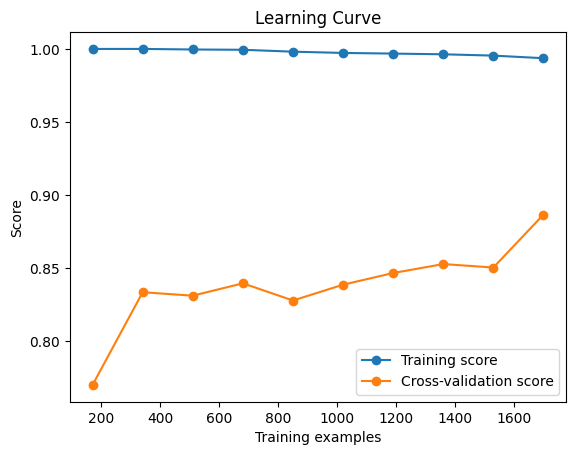

In [17]:
train_sizes, train_scores, test_scores = learning_curve(gradient_boosting_after,X_selected, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

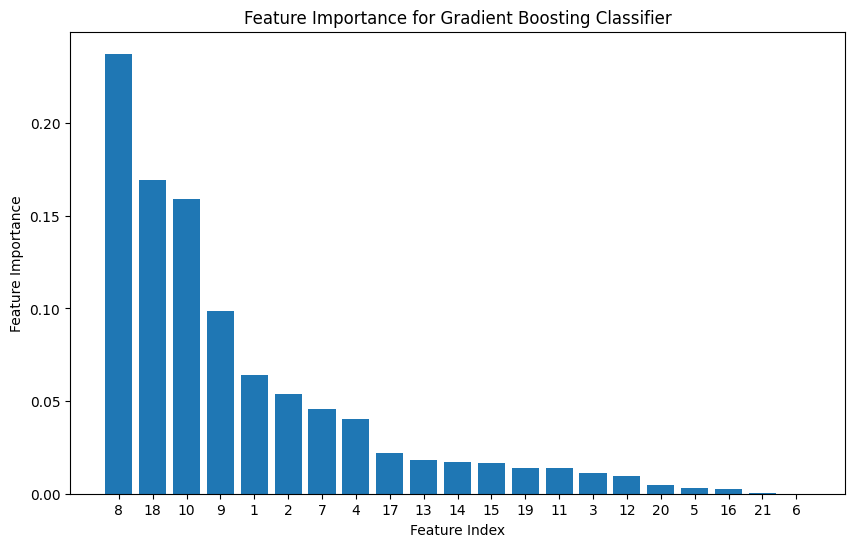

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

gb_classifier.fit(X_train, y_train)

feature_importances = gb_classifier.feature_importances_

sorted_features_indices = feature_importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_features_indices])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Gradient Boosting Classifier')
plt.xticks(range(X.shape[1]), sorted_features_indices + 1)  # Adding 1 to make indices start from 1
plt.show()
